<a href="https://colab.research.google.com/github/Nolberto-Rivera/MAT306-EntregablesNRivera/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



**Respuesta PARTE 1**

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

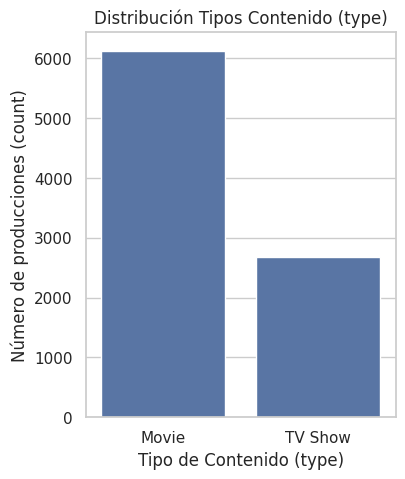

In [9]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='type')
plt.title('Distribución Tipos Contenido')
plt.xlabel('Tipo de Contenido (type)')
plt.ylabel('Número de Producciones (count)')
plt.show()

Priman los filmes. Para los usuarios esto significa que aquellos que no quieren empezar una serie, con el compromiso que esto significa, tienen un oferta importante de películas, que funcionan de manera más independiente entre sí (aunque dos películas distintas todavía pueden ser partes de una misma franquicia), para un consumo más esporádico.

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

In [28]:
by_release = df['release_year'].sort_values().reset_index().drop(columns='index')
by_release

,release_year
0,1925
1,1942
2,1942
3,1943
4,1943
...,...
8802,2021
8803,2021
8804,2021
8805,2021


In [32]:
n_years = by_release['release_year'][len(by_release)-1] - by_release['release_year'][0]
n_years

np.int64(96)

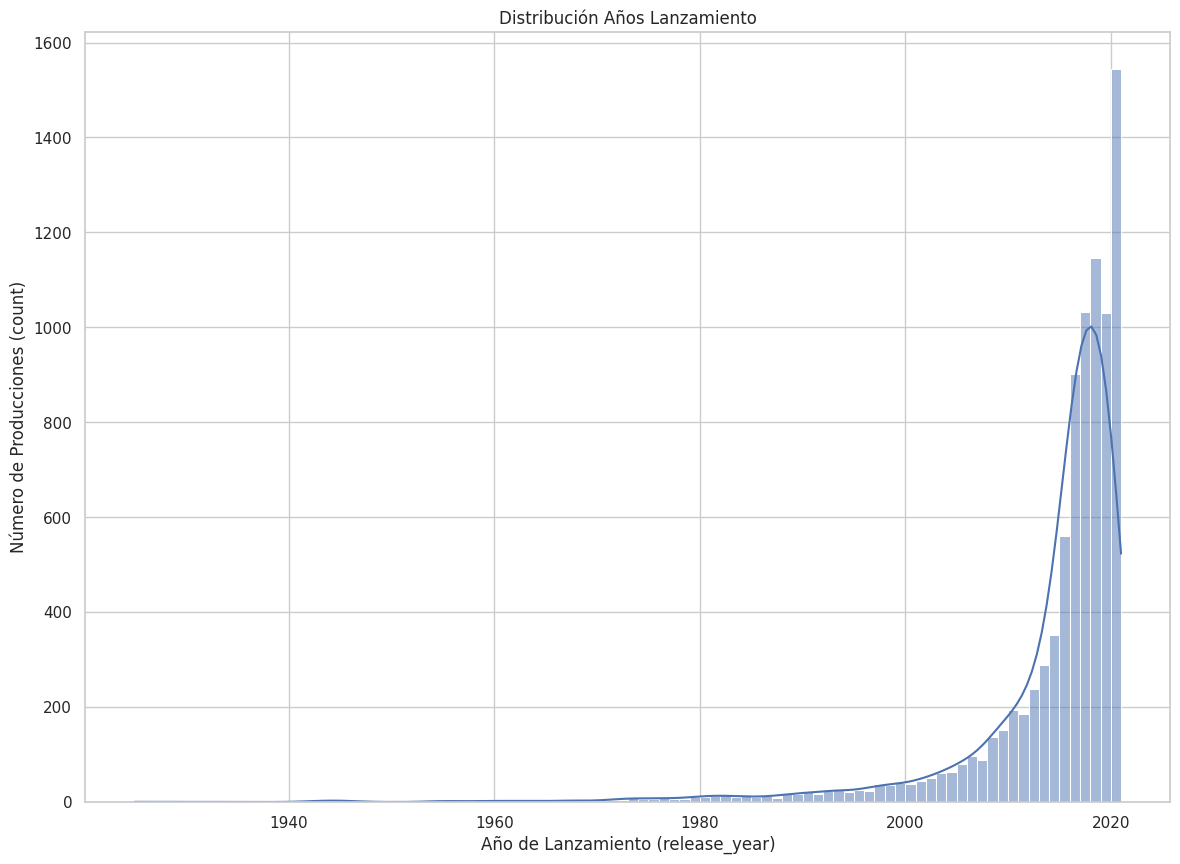

In [35]:
plt.figure(figsize=(14, 10))
sns.histplot(data=df, x='release_year', bins=n_years, kde=True)
plt.title('Distribución Años Lanzamiento')
plt.xlabel('Año de Lanzamiento (release_year)')
plt.ylabel('Número de Producciones (count)')
plt.show()

Hay más contenido reciente. Hay un crecimiento prácticamente monótono desde (por ejemplo) 1990; importantemente, 2020 tiene menos producciones que sus vecinos, probablemente por la pandemia y las restricciones impuestas para el control de la misma (para este año Netflix ya existía).

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?

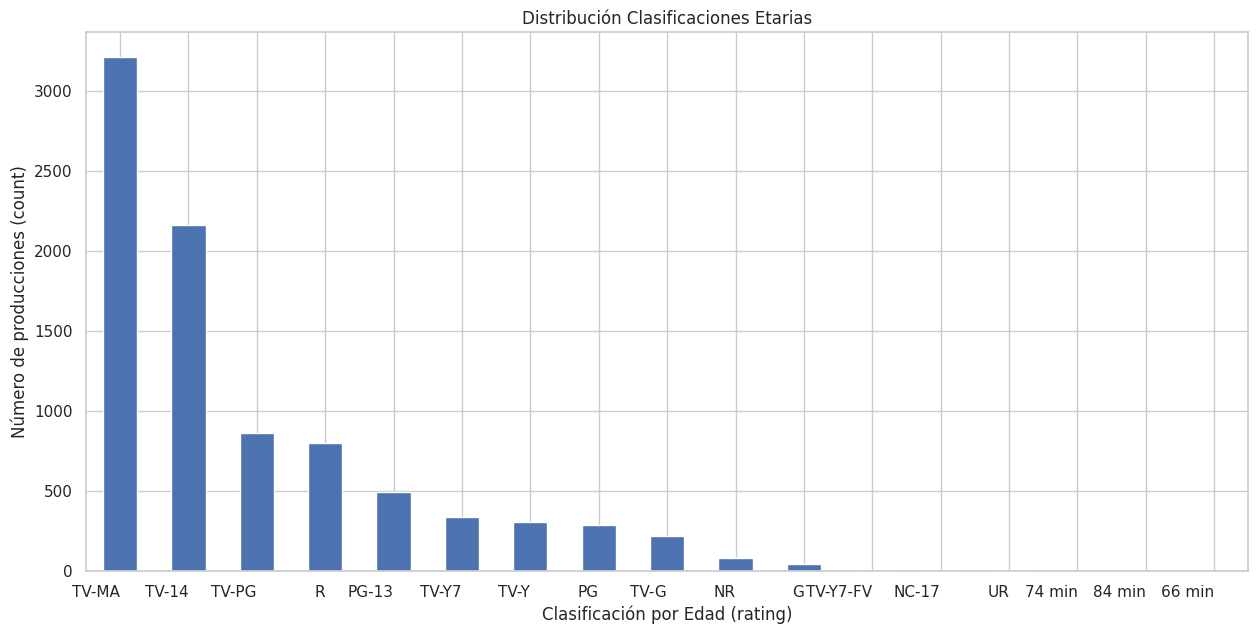

In [44]:
plt.figure(figsize=(15, 7))
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribución Clasificaciones Etarias')
plt.xlabel('Clasificación por Edad (rating)')
plt.ylabel('Número de producciones (count)')
plt.xticks(rotation=0, ha='right')
#plt.tight_layout()
plt.show()

In [53]:
# Las clasificaciones a la derecha de NC-17 son despreciables, y parecen deberse a typos. No las consideramos.
# Existen dos clasificaciones (de contenido más general a más adulto):
# TV_Parental_Guidelines, y
TVPG = ['TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
df_TVPG = df.loc[df['rating'].isin(TVPG)]
# Motion Picture Association film rating system
MPAfrs = ['G', 'PG', 'PG-13', 'R', 'NC-17']
df_MPAfrs = df.loc[df['rating'].isin(MPAfrs)]

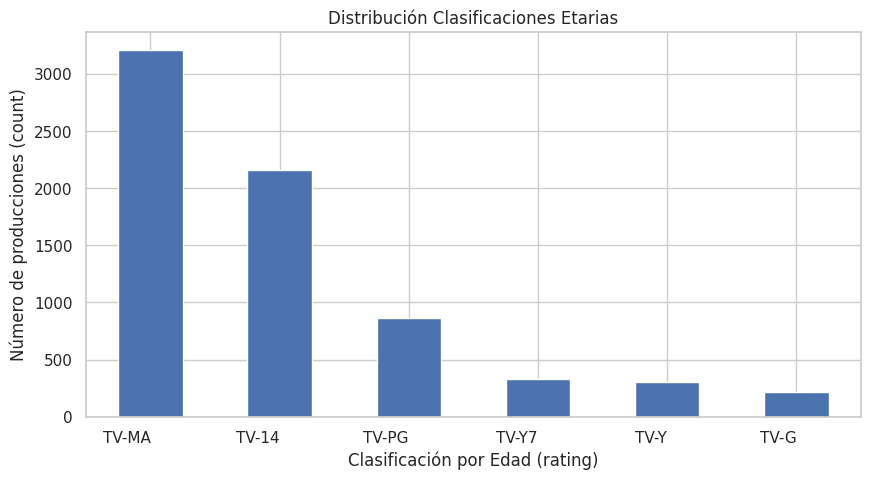

In [63]:
plt.figure(figsize=(10, 5))
df_TVPG['rating'].value_counts().plot(kind='bar')
plt.title('Distribución Clasificaciones Etarias')
plt.xlabel('Clasificación por Edad (rating)')
plt.ylabel('Número de producciones (count)')
plt.xticks(rotation=0, ha='right')
#plt.tight_layout()
plt.show()

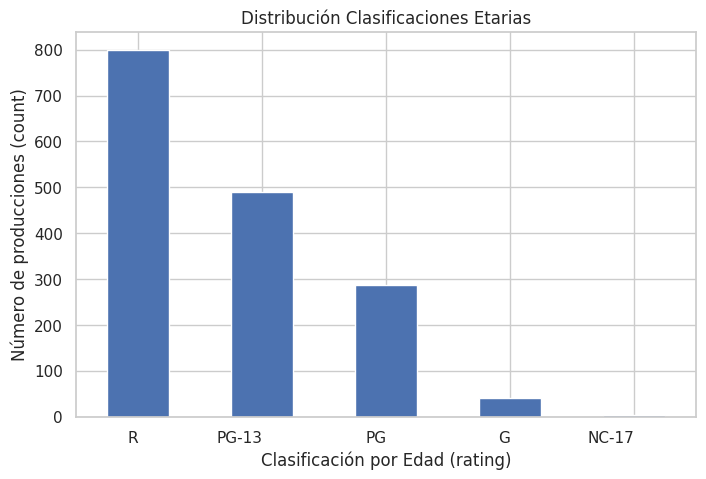

In [62]:
plt.figure(figsize=(8, 5))
df_MPAfrs['rating'].value_counts().plot(kind='bar')
plt.title('Distribución Clasificaciones Etarias')
plt.xlabel('Clasificación por Edad (rating)')
plt.ylabel('Número de producciones (count)')
plt.xticks(rotation=0, ha='right')
#plt.tight_layout()
plt.show()

La mayor parte de las producciones están clasificadas por edades según TV Parental Guidelines.

Tanto para estas como para las graduadas según el sistema de la Motion Picture Association, tenemos que, a grandes rasgos, el número de producciones disminuye mientras más amigable es la producción.

Las excepciones son:
* Para TV Parental Guidelines: G aparece al final (se aplica menos porque es muy restrictivo).
* Para Motion Picture Association: NC-17 aparece al final (designa producciones ostensible adultas).



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


**Respuesta PARTE 2**

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

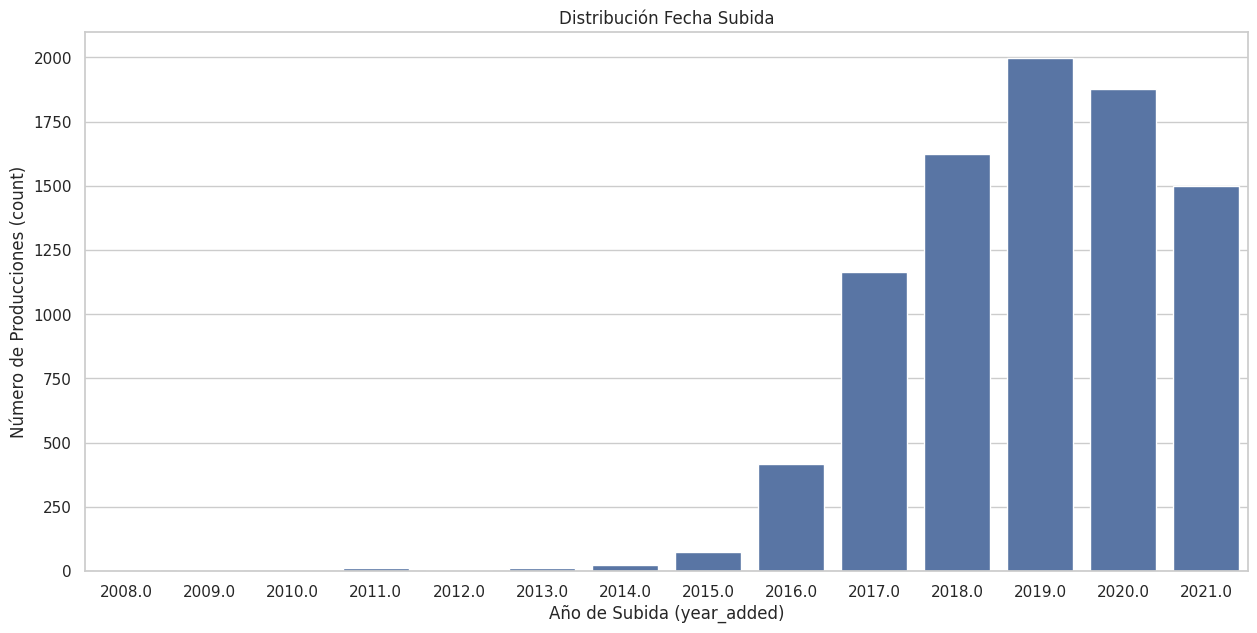

In [96]:
df['date_added'] = pd.to_datetime(df['date_added'], errors="coerce")

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

plt.figure(figsize=(15,7))
sns.countplot(data=df, x="year_added")
plt.title("Distribución Fecha Subida")
plt.xlabel("Año de Subida (year_added)")
plt.ylabel("Número de Producciones (count)")
plt.xticks(rotation=0)
plt.show()

Netflix empezó su expansión internacional en 2012. Desde 2015 podemos ver un crecimiento monótono casi ininterrumpido, excepto para pasado 2019, cuando la pandemia empieza a pesar para industria cinematográfica.

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

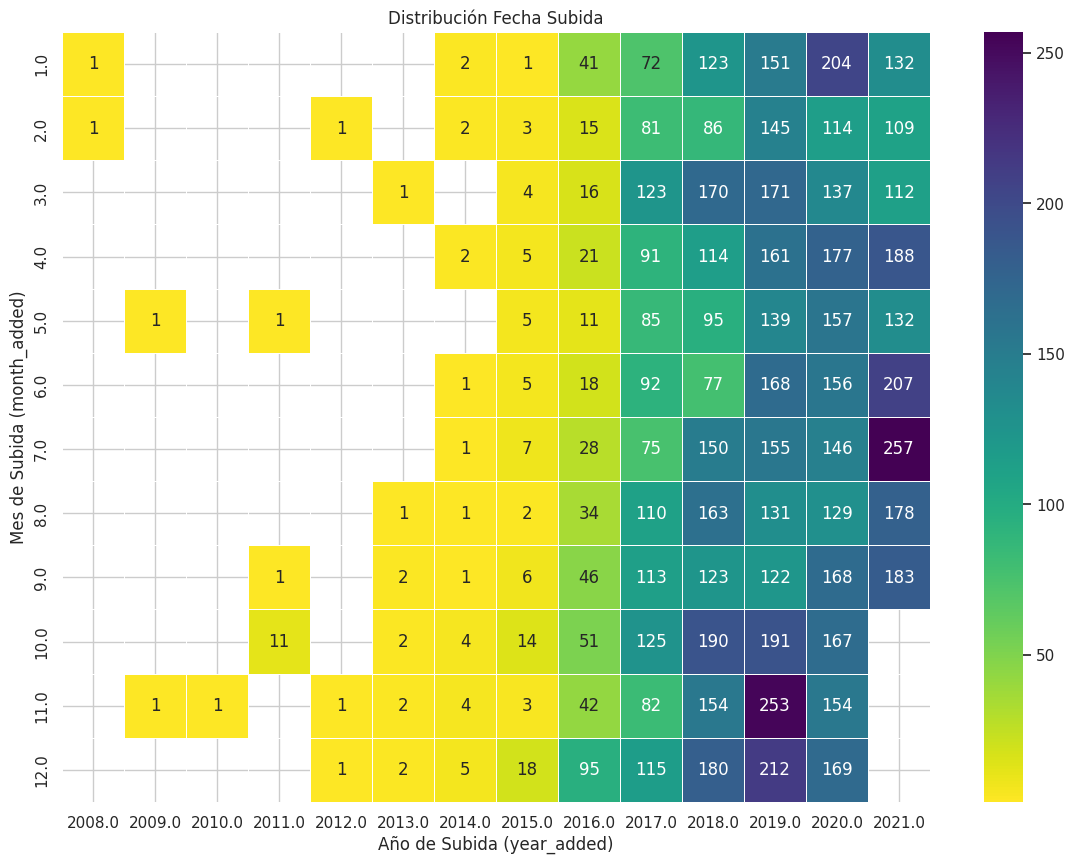

In [105]:
month_x_year = df.pivot_table(index="month_added", columns="year_added", values="show_id", aggfunc="count")

plt.figure(figsize=(14,10))
sns.heatmap(month_x_year, linewidths=.5, annot=True, cmap = 'viridis_r', fmt=".0f")
plt.title("Distribución Fecha Subida")
plt.xlabel("Año de Subida (year_added)")
plt.ylabel("Mes de Subida (month_added)")
plt.show()

El año de subida importa más que el mes de subida, pero, de todos modos, en cada año podemos ver que la mayor cantidad de lanzamientos se concentra en la última porción del año (digamos rondando noviembre-diciembre, incluyendo quizá enero del año que sigue), lo cual tiene sentido, considerando las festividades de fin de año como Halloween, Navidad o Año Nuevo.

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2655606792.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_in_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2655606792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_in_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2655606792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

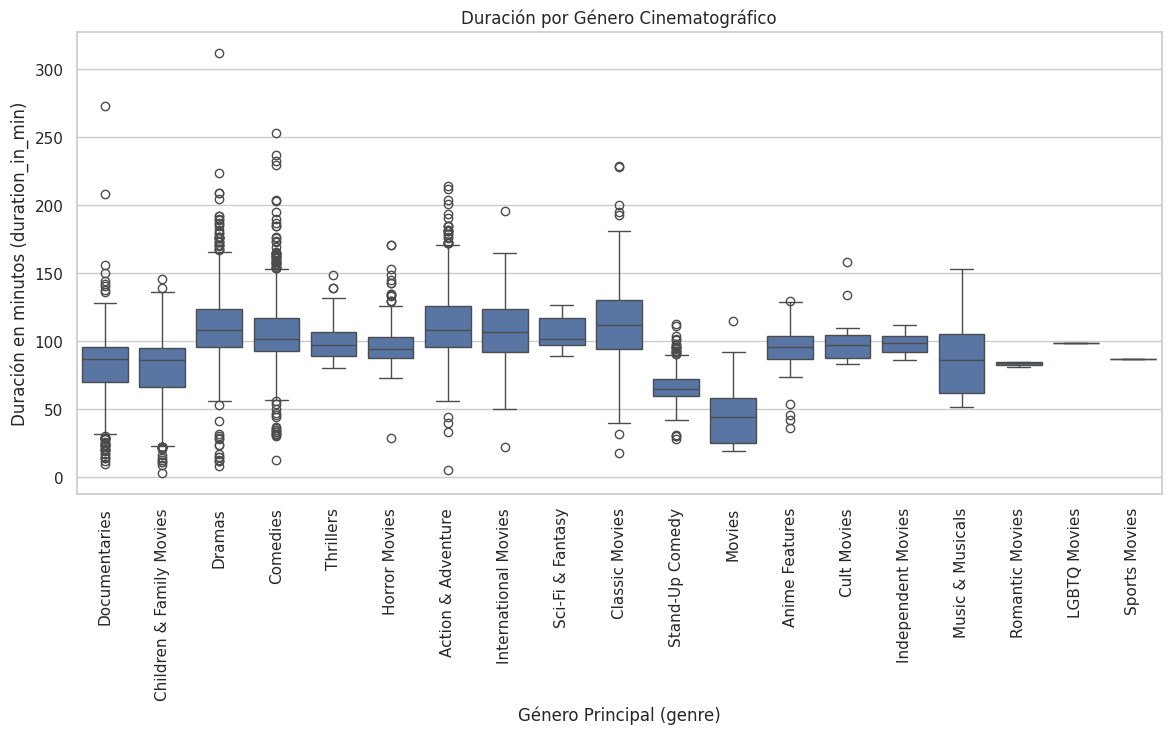

In [107]:
df_movies = df.loc[df['type'] == 'Movie']
df_movies['duration_in_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_movies['genre'] = df_movies['listed_in'].str.split(',').str[0]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_movies, x="genre", y="duration_in_min")
plt.title("Duración por Género Cinematográfico")
plt.xlabel("Género Principal (genre)")
plt.ylabel("Duración en Minutos (duration_in_min)")
plt.xticks(rotation=90)
plt.show()

Analizando las medianas, podemos hacernos una idea de que las películas clásicas, de acción e internacionales suelen durar más, mientras que las películas sin clasificación (Movies) y los especiales de *stand-up comedy* suelen ser más breves.

Sobre la variabilidad (analizando el ancho de las barras de error, y la cantidad y valores de los *outliers*): dramas, comedias y películas de acción tienen mayor variabilidad; mientras que películas independientes y de fantasía/ciencia-ficción tienen la menor variabilidad (las categorías con una variabilidad aún menor quizá tienen una variabilidad tan pequeña porque hay pocas películas en esas categorías, simplemente).



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?

**Respuesta PARTE 2**

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

In [ ]:
# FIXME

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?